# Student Perfomance Prediction

## 1. Understanding the Problem

- We are trying to access the relations between students performance and other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
- We are going to build a regression model to predict the studens performance given the other variables.

## 2. Data Preprocessing

### 2.1 Data Collection

- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

### 2.2 Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 2.3 Import Dataset

In [ ]:
df = pd.read_csv('data\StudentsPerformance.csv')

In [ ]:
# df.columns = [col.replace(' ', '_').replace('/', '_') for col in df.columns]
# df.to_csv('data\StudentsPerformance.csv', header= True, index= False)

In [3]:
print(df.shape)
df.head()

(1000, 8)


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
categorical_variables = [col for col in df.columns if df[col].dtypes == 'object']
numerical_variables = [col for col in df.columns if df[col].dtypes != 'object']

print(f'The dataset has {len(categorical_variables)} categorical variables: {categorical_variables}')
print(f'The dataset has {len(numerical_variables)} numerical variables: {numerical_variables}')

The dataset has 5 categorical variables: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']
The dataset has 3 numerical variables: ['math_score', 'reading_score', 'writing_score']


## 3.1 Number of missing values and duplicated entries

In [6]:
df.isna().sum(axis = 0)

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [7]:
print(df.duplicated().sum())

0


There is no missing values and duplicate entries

## 4.1 Statistics of Data Set

In [8]:
df[categorical_variables].describe(include='all')

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


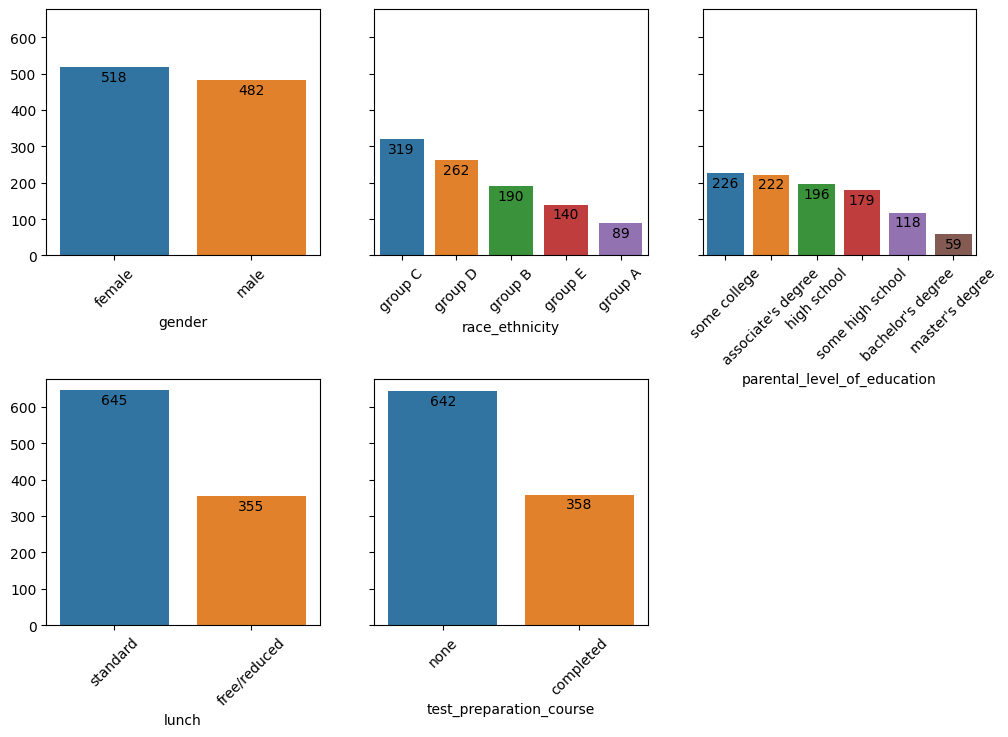

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(12, 8), sharey=True)  # Increase figsize for better clarity

for i, col in enumerate(categorical_variables):
    ax = plt.subplot(2, 3, i + 1)
    sns_bar = sns.barplot(
        x=df[col].value_counts().index,
        y=df[col].value_counts().values,
        ax=ax,
        hue=df[col].value_counts().index
    )
    plt.xticks(rotation=45)
    for container in sns_bar.containers:
        plt.bar_label(container, fontsize = 10, padding = -12)

plt.subplots_adjust(hspace=0.5)
fig.delaxes(axes[1, 2])
plt.show()

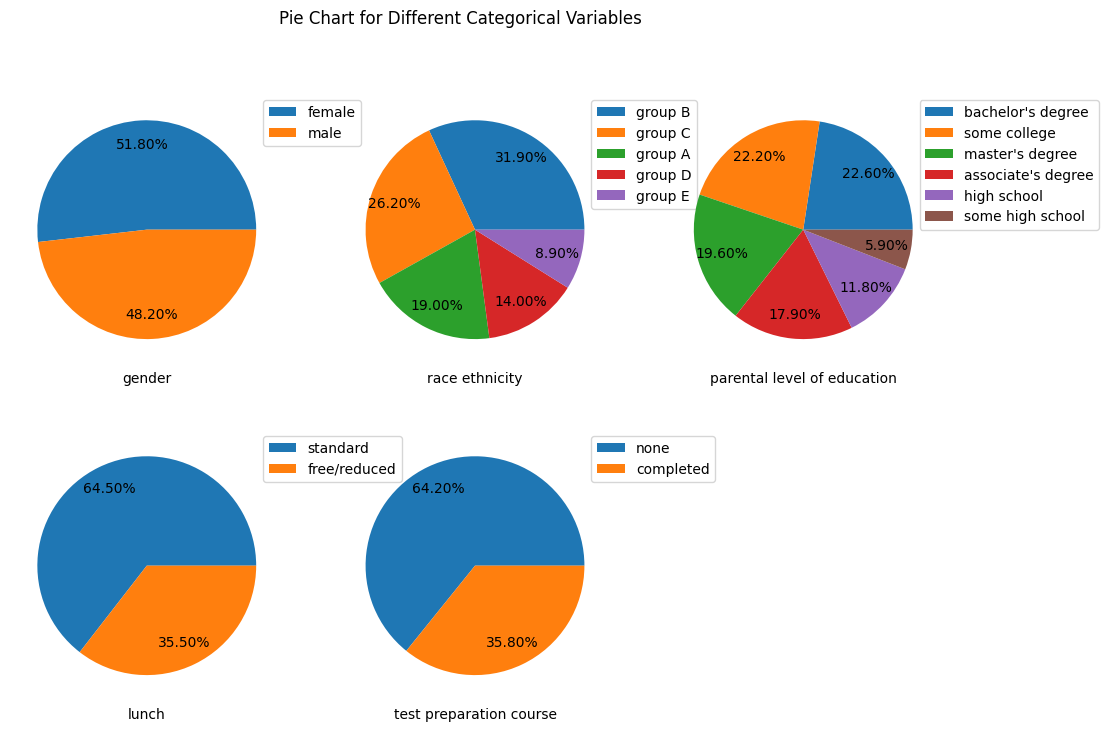

In [10]:
fig, axs = plt.subplots(2, 3, figsize=(12, 8))
fig.delaxes(axs[1,2])
fig.suptitle('Pie Chart for Different Categorical Variables')

for i, col in enumerate(categorical_variables):
    plt.subplot(2, 3, i+1)
    plt.pie(x= df[col].value_counts(),
            #labels = df[col].unique(),
            autopct= '%.2f%%', 
            pctdistance= .78
            )
    plt.legend(df[col].unique(),
               #loc = (.8,.8),
               bbox_to_anchor=(.9, 1),
               ncol = 1 )
    plt.xlabel(' '.join(col.split('_')))

plt.show()

In [11]:
df[numerical_variables].describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## 5.1 Creating Total and Average columns

In [12]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3

In [13]:
total_full = df[df['total_score']== 300]['total_score'].count()
math_full = df[df['math_score']== 100]['math_score'].count()
reading_full = df[df['reading_score']== 100]['reading_score'].count()
writing_full = df[df['writing_score']== 100]['writing_score'].count()

print(f'Number of students with full marks in All Subjects: {total_full}')
print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in All Subjects: 3
Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


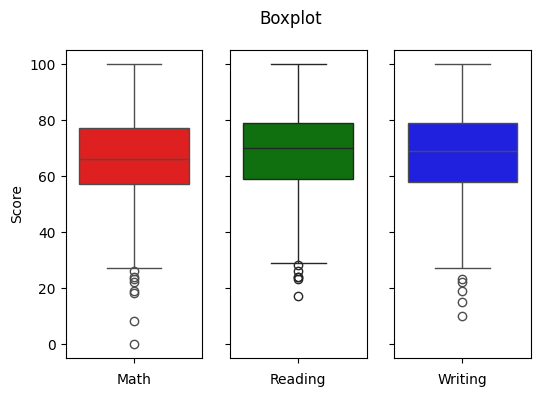

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(6, 4), sharey=True)
fig.suptitle("Boxplot")

ax1 = plt.subplot(1, 3, 1)
sns.boxplot(df['math_score'], ax=ax1, color = 'red')
plt.xlabel('Math')
plt.ylabel('Score')

ax2 = plt.subplot(1, 3, 2)
sns.boxplot(df['reading_score'], ax=ax2, color = 'green')   
plt.xlabel('Reading')

ax3 = plt.subplot(1, 3, 3)
sns.boxplot(df['writing_score'], ax=ax3, color = 'blue')
plt.xlabel('Writing')
plt.show()

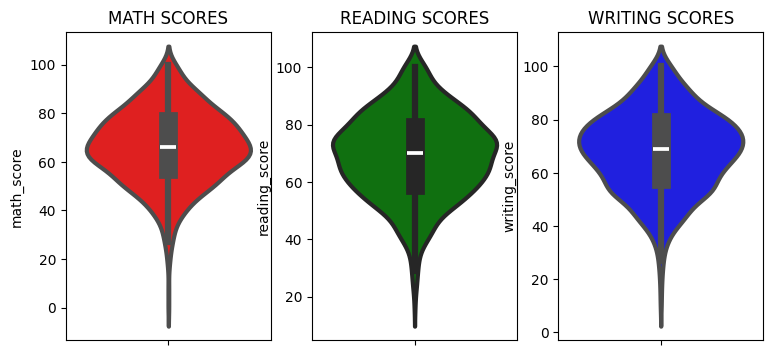

In [15]:
plt.figure(figsize=(9,4))
plt.subplot(1, 3, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1, 3, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='green',linewidth=3)
plt.subplot(1, 3, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='blue',linewidth=3)
plt.show()

## 6. Exploring Data (Visualizations)

In [16]:
categorical_variables

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

### 6.1 Effect of Gender and Lunch Type

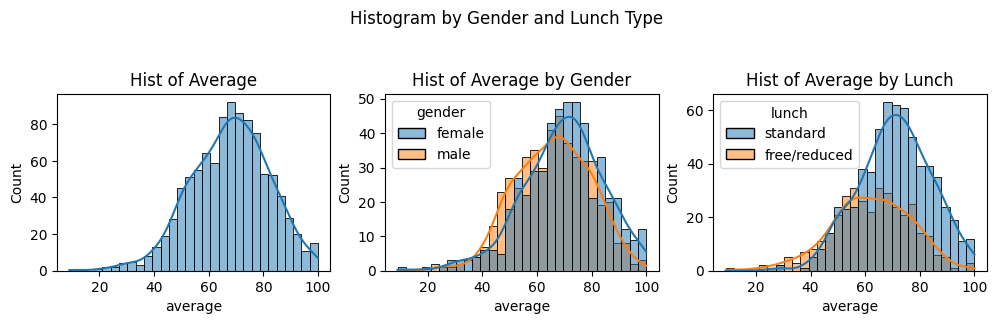

In [17]:
### Histogram and KDE Plot
fig, axs = plt.subplots(1, 3, figsize=(12, 3))
fig.suptitle("Histogram by Gender and Lunch Type") 
plt.subplots_adjust(top=0.7)

plt.subplot(131)
sns.histplot(df['average'], kde=True, bins= 30)
plt.title('Hist of Average')

plt.subplot(132)
sns.histplot(data = df, x= 'average', hue = 'gender', kde = True, bins = 30)
plt.title('Hist of Average by Gender')

plt.subplot(133)
sns.histplot(data = df, x= 'average', hue = 'lunch', kde = True, bins = 30)
plt.title('Hist of Average by Lunch')

plt.show()

Here, we can see that 
- students with standard lunch do better performance than the students with free/reduced lunch
- female students do better performance than male students

In [18]:
group_table = df.groupby(['lunch'], as_index = False)['average'].mean()
#group_table = df.groupby(['lunch'])['average'].mean().reset_index()
group_table

,lunch,average
0,free/reduced,62.199061
1,standard,70.837209


In [19]:
group_table = df.groupby(['lunch', 'gender'], as_index = False)['average'].mean()
group_table.pivot(index = 'gender', columns = 'lunch', values = 'average')

lunch,free/reduced,standard
gender,,
female,63.215168,73.219858
male,61.042169,68.356540


In [20]:
pivot_table = pd.pivot_table(df, index = 'gender',columns= 'lunch', values = 'average', aggfunc = 'mean')
pivot_table

lunch,free/reduced,standard
gender,,
female,63.215168,73.219858
male,61.042169,68.356540


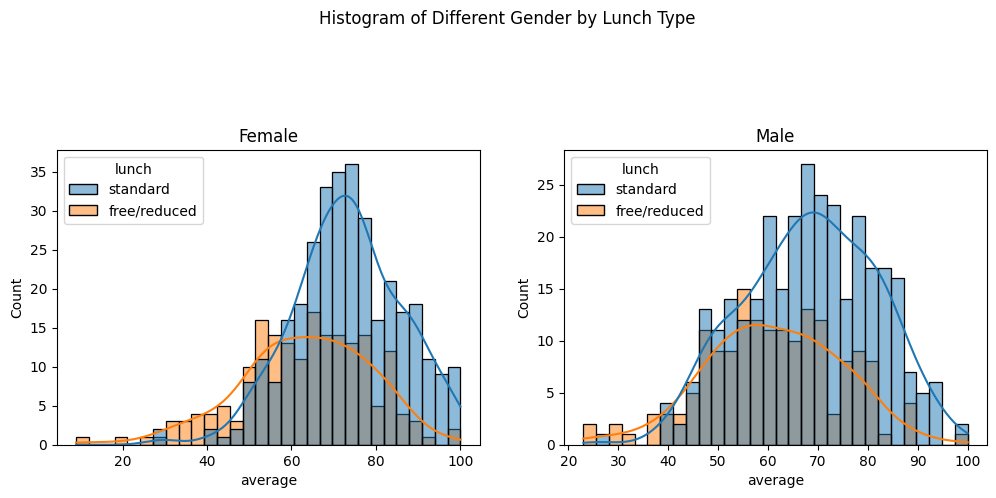

In [21]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Histogram of Different Gender by Lunch Type")
plt.subplots_adjust(top=0.7)

plt.subplot(121)
sns.histplot(data= df[df['gender'] == 'female'], x= 'average', kde = True, bins = 30, hue= 'lunch', hue_order= ['standard', 'free/reduced'])
plt.title('Female')

plt.subplot(122)
sns.histplot(data= df[df['gender'] == 'male'], x= 'average', kde = True, bins = 30, hue= 'lunch', hue_order= ['standard', 'free/reduced'])
plt.title('Male')
plt.show()

Insights
- Standard lunch helps perform well in exams.
- Standard lunch helps perform well in exams be it a male or a female.

### 6.2 Effect of Parental Education Level on Score

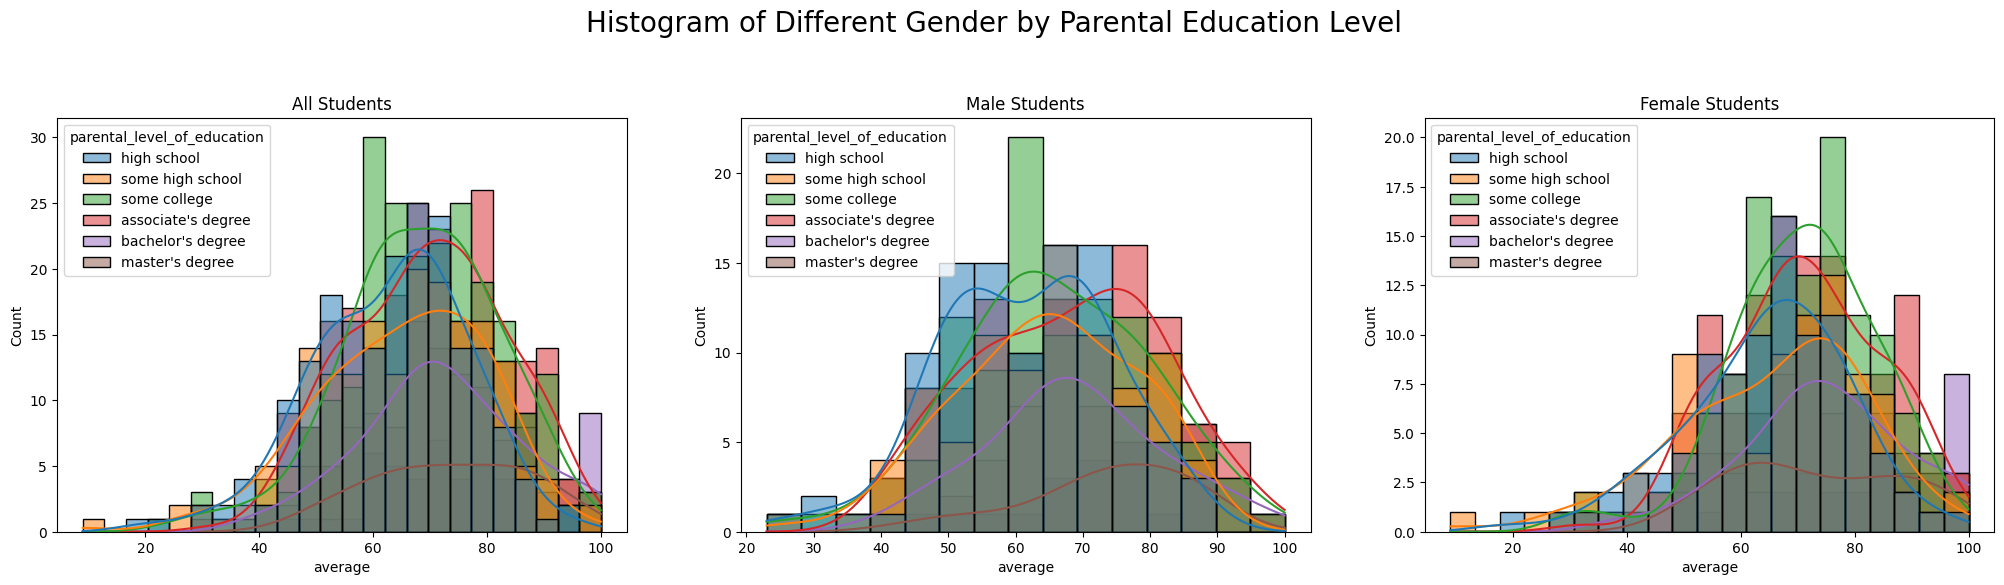

In [22]:
fig, axs = plt.subplots(1,3,figsize=(25,6))
fig.suptitle("Histogram of Different Gender by Parental Education Level", fontsize=20)
plt.subplots_adjust(top=0.8)

plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue= 'parental_level_of_education', hue_order=['high school','some high school','some college', 'associate\'s degree', 'bachelor\'s degree',  'master\'s degree'])
plt.title('All Students')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='parental_level_of_education', hue_order=['high school','some high school','some college', 'associate\'s degree', 'bachelor\'s degree',  'master\'s degree'])
plt.title('Male Students')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='parental_level_of_education', hue_order=['high school','some high school','some college', 'associate\'s degree', 'bachelor\'s degree',  'master\'s degree'])
plt.title('Female Students')
plt.show()

In [23]:
group_table = df.groupby(['parental_level_of_education'], as_index = False)['average'].mean()
group_table

,parental_level_of_education,average
0,associate's degree,69.569069
1,bachelor's degree,71.923729
2,high school,63.096939
3,master's degree,73.598870
4,some college,68.476401
5,some high school,65.108007


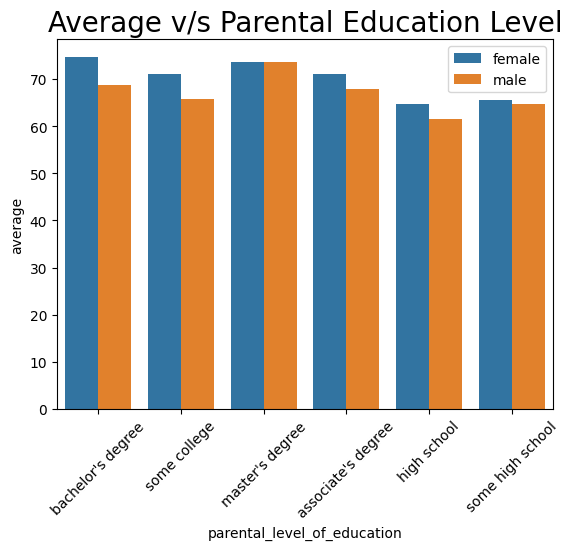

In [24]:
sns.barplot(data=df, x='parental_level_of_education', y='average', estimator=np.mean, hue='gender', errorbar=None)
plt.title('Average v/s Parental Education Level', fontsize=20)
plt.xticks(rotation=45)
plt.legend(loc= 'upper right')
plt.show()

In [25]:
pivot_table = pd.pivot_table(df,
               index = 'parental_level_of_education',
               columns = 'gender',
               values= 'average',
               aggfunc = 'mean')

pivot_table

gender,female,male
parental_level_of_education,,
associate's degree,71.123563,67.867925
bachelor's degree,74.671958,68.775758
high school,64.748227,61.575163
master's degree,73.648148,73.521739
some college,71.002825,65.716049
some high school,65.564103,64.636364


here, we can see that
- female students, with high school or some high school parents perform a little less
- male students, with master's degree parents perform a little better 

### 6.3 Effect of Race on Score

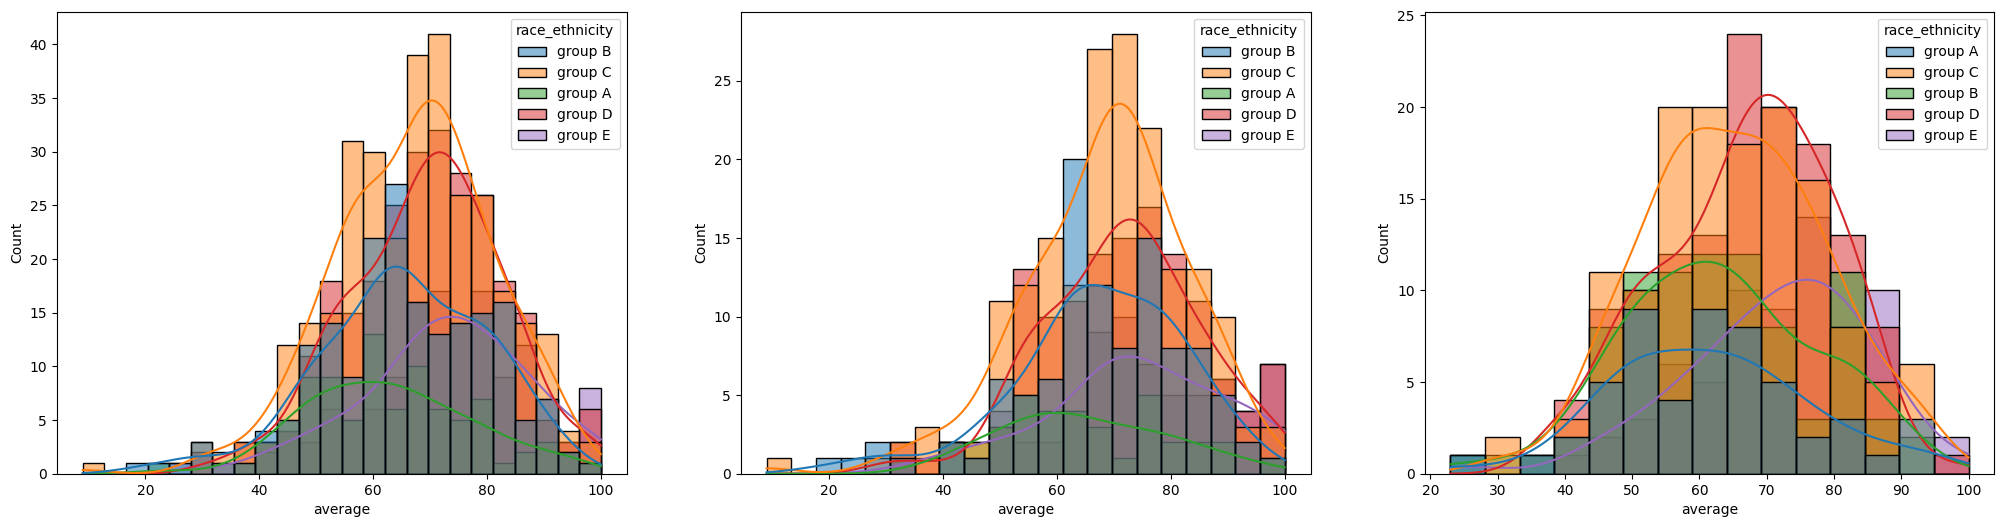

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average',kde=True,hue='race_ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='race_ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='race_ethnicity')
plt.show()

In [27]:
pivot_table = pd.pivot_table(df, index = 'race_ethnicity', columns= 'gender', values= 'average', aggfunc= 'mean')
pivot_table

gender,female,male
race_ethnicity,,
group A,65.129630,61.540881
group B,67.509615,63.000000
group C,68.585185,65.249400
group D,71.439276,66.987469
group E,74.062802,71.478873


In [28]:
group_table = df.groupby(['race_ethnicity'], as_index = False)['average'].mean()
group_table

,race_ethnicity,average
0,group A,62.992509
1,group B,65.468421
2,group C,67.131661
3,group D,69.179389
4,group E,72.752381


Here we can see that,
- Students of Group E perform well
- On the other hand, Group A and B perform poorly

### 6.4 Bivariate Analysis 
- (Does Gender has any impact on Student's performance?)

In [29]:
#gender_group = df.groupby('gender')[['math_score','reading_score','writing_score','total_score','average']].mean().reset_index()
gender_group = df.groupby('gender')[[col for col in df.columns if df[col].dtypes != 'O']].mean().reset_index()
gender_group

,gender,math_score,reading_score,writing_score,total_score,average
0,female,63.633205,72.608108,72.467181,208.708494,69.569498
1,male,68.728216,65.473029,63.311203,197.512448,65.837483


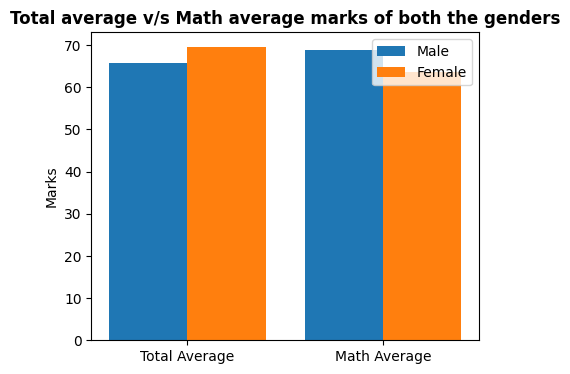

In [30]:
plt.figure(figsize=(5, 4))

X = ['Total Average','Math Average']


female_scores = [gender_group['average'][0], gender_group['math_score'][0]]
male_scores = [gender_group['average'][1], gender_group['math_score'][1]]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, male_scores, 0.4, label = 'Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label = 'Female')
  
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both the genders", fontweight='bold')
plt.legend()
plt.show()

Insights
- On average, females have a better overall score than men.
- whereas males have scored higher in Maths.

### 6.5 Univariate Analysis (Race & Ethnicity)

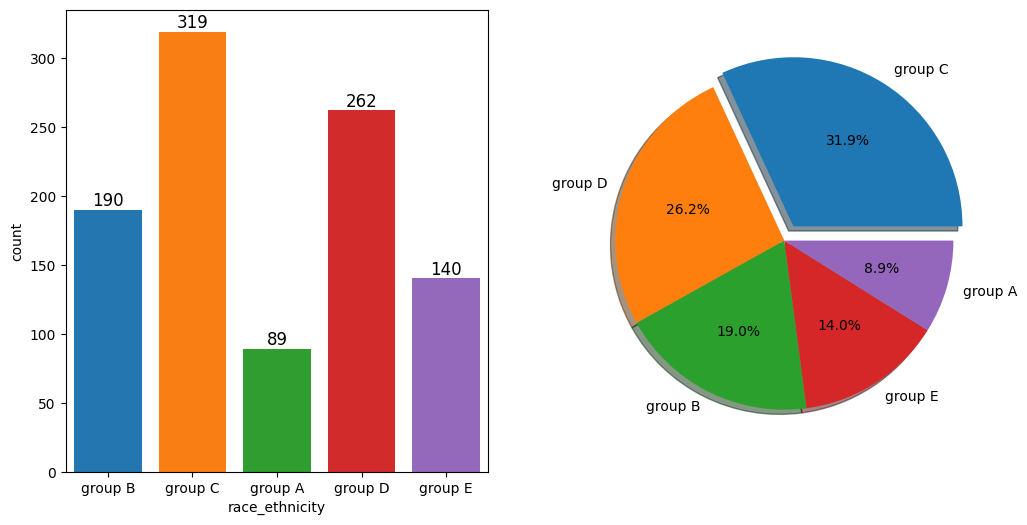

In [31]:

f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x=df['race_ethnicity'], hue='race_ethnicity',data=df, ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=12)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

### 6.6 BIVARIATE ANALYSIS 
- (Does Race or Ehnicity has any impact on student's performance?)

In [32]:
Group_data2 = df.groupby('race_ethnicity')[[col for col in df.columns if df[col].dtypes != 'O']].mean().reset_index()
Group_data2

,race_ethnicity,math_score,reading_score,writing_score,total_score,average
0,group A,61.629213,64.674157,62.674157,188.977528,62.992509
1,group B,63.452632,67.352632,65.600000,196.405263,65.468421
2,group C,64.463950,69.103448,67.827586,201.394984,67.131661
3,group D,67.362595,70.030534,70.145038,207.538168,69.179389
4,group E,73.821429,73.028571,71.407143,218.257143,72.752381


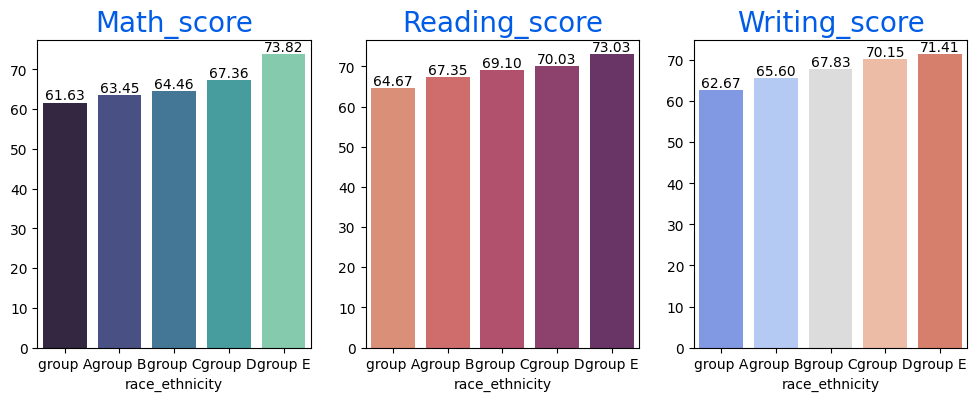

In [33]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(12,4))

sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, hue= Group_data2['math_score'].mean().index, palette = 'mako',ax=ax[0])
ax[0].set_title('Math_score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=10, fmt = '%.2f')

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values, hue = Group_data2['reading_score'].mean().index, palette = 'flare',ax=ax[1])
ax[1].set_title('Reading_score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=10, fmt = '%.2f')

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values, hue = Group_data2['writing_score'].mean().index,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing_score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=10, fmt = '%.2f')

Insights
- Group E students have scored the highest marks.
- Group A students have scored the lowest marks.
- Students from a lower Socioeconomic status have a lower avg in all course subjects

### 6.7 Bivariate Analysis 
- (Does parental education have any impact on student's performance?)

In [34]:
df.groupby('parental_level_of_education').mean().plot(kind='barh',figsize=(10,10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

TypeError: agg function failed [how->mean,dtype->object]

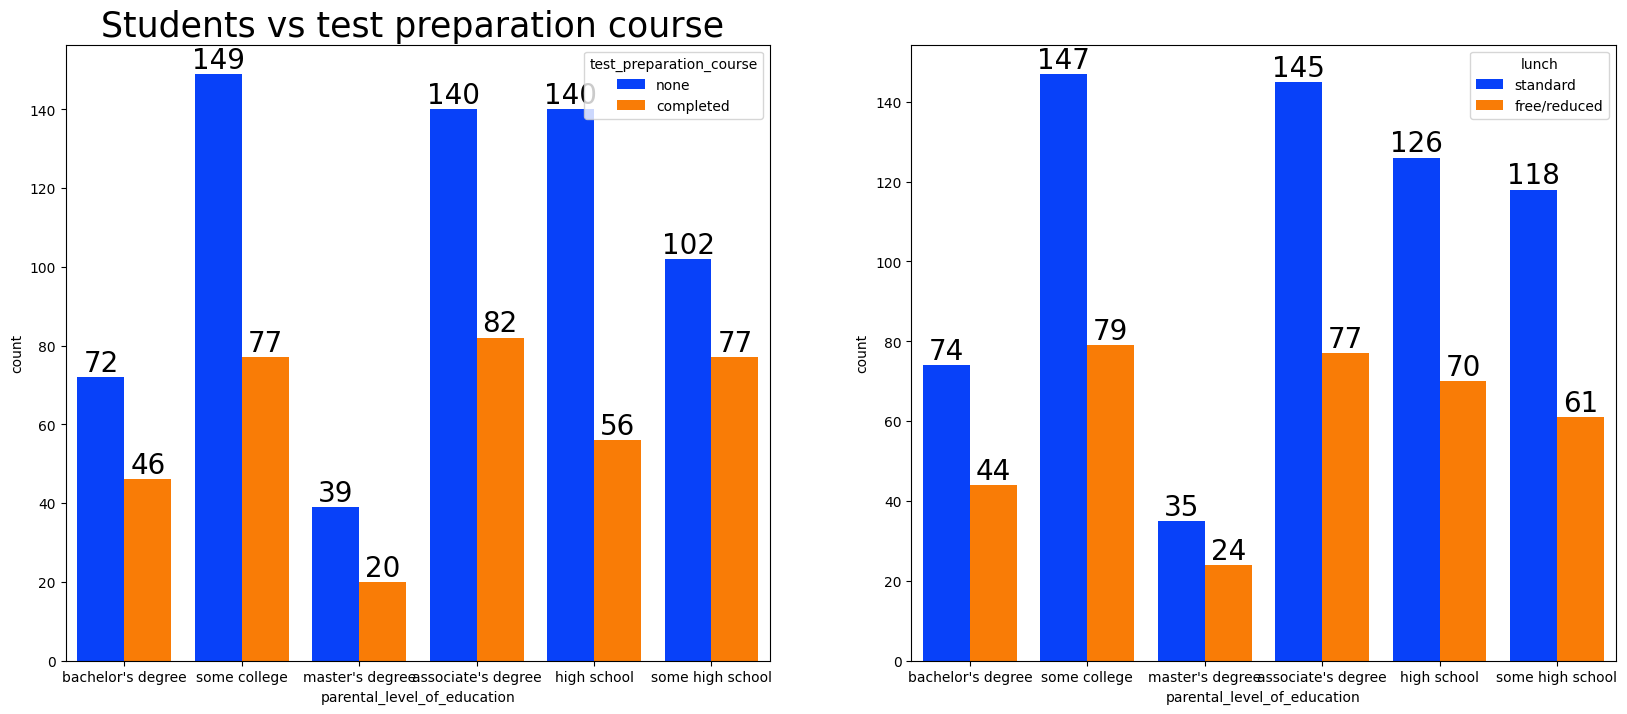

In [ ]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='test_preparation_course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental_level_of_education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)

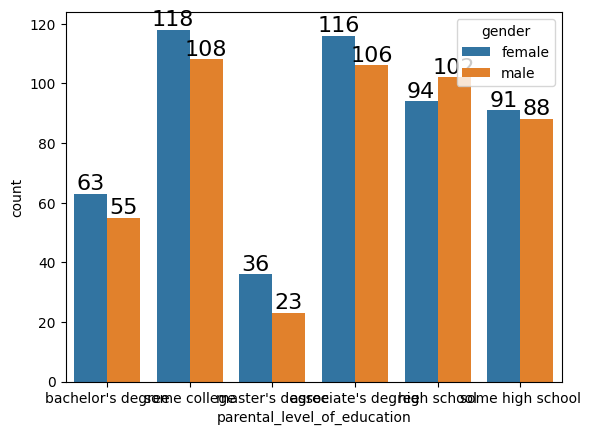

In [ ]:
sns_count = sns.countplot(data = df, x= df['parental_level_of_education'], hue= 'gender')
for container in sns_count.containers:
    plt.bar_label(container, fontsize= 16)
plt.show()